In [ ]:
#Tarea 5 y 6 - Metodos Computacionales - Universidad de Los Andes  
#Samuel David Cañas Molina - 201922001 

In [4]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline

Tarea 5 y 6: Ecuación de difusión en 3 dimensiones

*Samuel David Cañas Molina - 201922001* 

Uds se preguntarán, ¿por qué vamos a resolver la ecuación de difusión? La respuesta no es muy obvia, pero es interesante: Los procesos de difusión comparten algo muy bonito con los procesos estocásticos. Para ello, vamos a analizar un problema de COVID: el tiempo medio estimado de infección de los viriones.

La transmisión de COVID se da preponderamente debido a la aspersión de aerosoles en el aire. Estas partículas semi-esféricas -cuyo orden de magnitud es de  de radio- están compuestas principalmente por agua, lípidos orgánicos y viriones (se pueden considerar quasi-puntuales ya que son del orden de los ). Cuando una particula del aerosol entra y se adhiere al tracto respiratorio, el virus toma un tiempo en entrar en contacto con las células para infectar el huésped debido al movimiento Browniano. Los viriones, a diferencia de las bacterias, no cuentan con cilios, flagelos u otros mecanismos para desplazarse en los medios, por lo cual, su única esperanza es que por fluctuaciones térmicas puedan llegar a la superficie de la gota de aerosol para replicar su ADN al entrar en contacto con los tejidos susceptibles. Este proceso es en esencia estocástico y se puede modelar mediante la ecuación de Difusión. Esta ecuación tiene dos partes. La idea es que uds resuelvan el problema de la manera más sencilla. La ecuación es la siguiente,
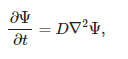
donde  es la constante de difusión del medio y  es la concentración de partículas. La taza de difusión depende de la temperatura y la viscosidad del medio y se puede modelar usando la relación de Einstein-Stokes,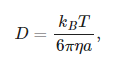
siendo 
 la constante de Boltzmann,  la temperatura en grados Kelvin,  la viscosidad del medio y  el radio de los viriones. En esencia, lo que la ecuación de difusión me está diciendo es que la concentración media de viriones depende de la posición y el tiempo. No obstante, para poder calcular el tiempo que tardaría un virión en alcanzar la superficie se puede modelar en la media usando la siguiente ecuación de difusión,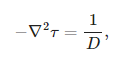donde  es el tiempo medio que dependería de la posición en la que se encuentra inicialmente.

In [ ]:
#Punto 1 

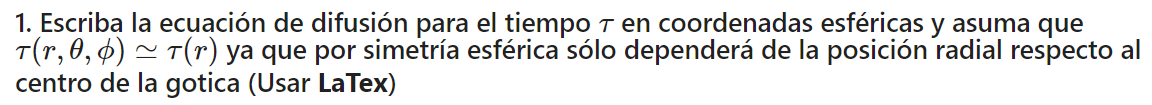

$\frac{\partial ^{2}\tau }{\partial r^{2}}+\frac{2}{r}\cdot \frac{\partial \tau }{\partial r}+\frac{6\pi \eta a}{k_{B}T}= 0$

In [ ]:
#Punto 2 

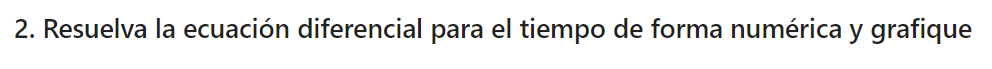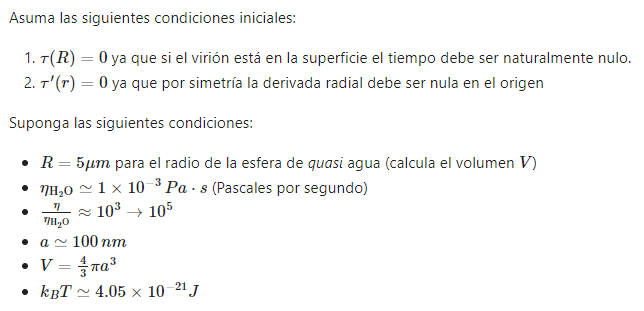

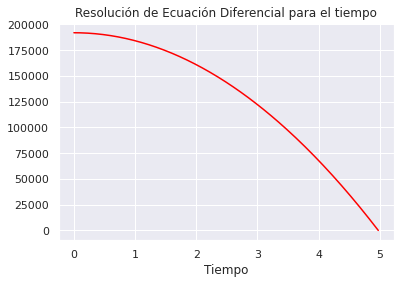

In [7]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
get_ipython().run_line_magic('matplotlib', 'inline')

eta = 1*10**(-3)*(10**5)
a = 1*10**(-7)
D = (4.05*10**(-21))/(6*np.pi*eta*a)
R = 5*10**(-6)
N = 200
dr = (R)/(N)
c0 = 0
cN = 0
r = np.arange(0, R, dr)

f = np.matrix([np.array([(r[i]-dr if j == i-1 and i > 0 else 0)for j in range(N)])for i in range(N) ]) 
f = f + np.matrix([np.array([(-2*r[i] if j == i else 0)for j in range(N)])for i in range(N) ]) 
f = f + np.matrix([np.array([(r[i]+dr if j == i+1 and i < N-1 else 0)for j in range(N)])for i in range(N) ])

f[0,:] = np.zeros(N)
f[0,0] = 1
f[0,1] = -1
f[-1, -1] = 1

c = (-r*(dr**2)/D)
c[0] = c0
c[-1] = cN
c = np.matrix(c).T

Tau = np.array((np.linalg.inv(f)*c).T).flatten()
r1 = np.arange(0,5,5/N)

plt.title('Resolución de Ecuación Diferencial para el tiempo')
plt.xlabel("Tiempo")
plt.plot(r1, Tau, c="#FF0000")

In [ ]:
#Punto 3 

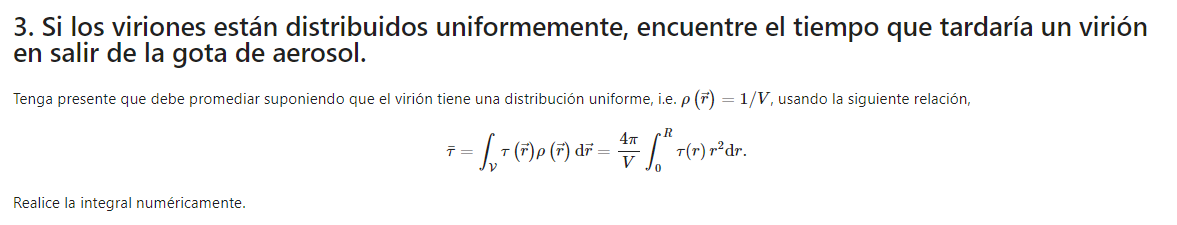

In [11]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
from scipy.integrate import simps
V = (4/3)*np.pi*(5*10**(-6))**3  
sp.integrate.simps(Tau*r**2*4*np.pi/V, r)

75650.1968281572

In [ ]:
#Punto 4 

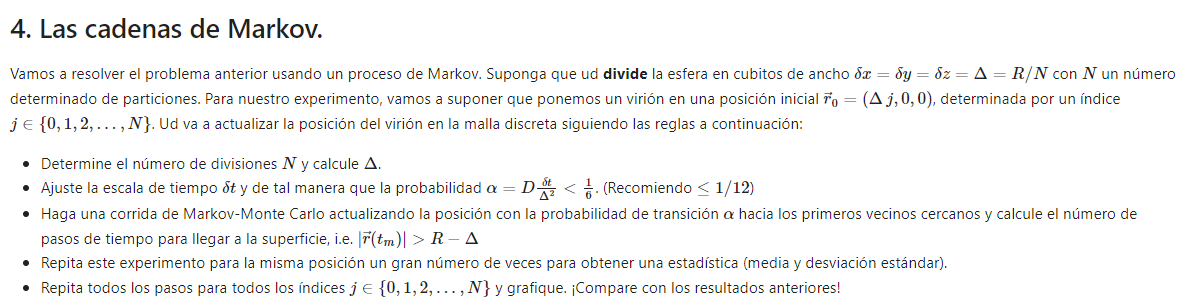

In [3]:
#Codigo

In [ ]:
#Punto 5 

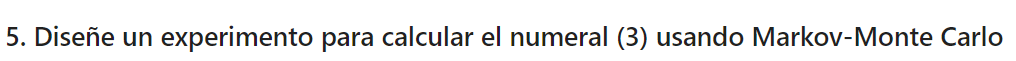

In [ ]:
#Codigo 